In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import pprint
import math

In [2]:
f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

print(f_range,f_resolution)

6250.0 1.52587890625


## データの可視化

In [3]:
path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

data = np.load(npz_files[0])
df = pd.DataFrame(data["arr_0"])

In [4]:
df.head()

0    1    2           3           4           5           6           7   \
0  0.0  0.0  0.0  172.896067   75.659870   96.913210  126.852502  152.509383   
1  0.0  0.0  0.0  176.513317  120.790621  113.915134  116.382145   80.845047   
2  0.0  0.0  0.0  251.178517  169.793157  121.180175  156.818553  142.408379   
3  0.0  0.0  0.0  237.754544  125.246630  122.038119  166.869081  100.871204   
4  0.0  0.0  0.0  296.303427  179.171441  161.548251  215.471876  170.583987   

           8           9   ...          26          27   28          29  \
0  164.901414  107.016648  ...  152.960024   78.147004  0.0  133.712606   
1  150.530764  134.222003  ...  208.847703  206.210189  0.0  254.259988   
2  196.484898  194.989692  ...  190.705287  158.956494  0.0  250.707142   
3  199.701386  200.575498  ...  207.812320  215.175598  0.0  268.657783   
4  199.286052  219.685809  ...  183.715312  106.212339  0.0  263.826187   

           30          31   32          33   34   35  
0  124.421163   64.921512  0.0  113.410507  0.0  0.0  
1  138.196610  162.123140  0.0  135.773602  0.0  0.0  
2  208.473117  138.520222  0.0  209.710912  0.0  0.0  
3  204.637086  279.395816  0.0  242.327351  0.0  0.0  
4  204.310774  226.775384  0.0  216.436255  0.0  0.0  

[5 rows x 36 columns]

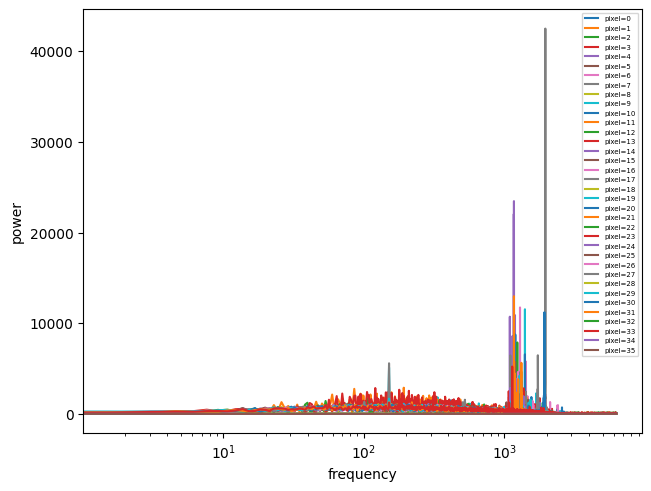

In [7]:
fig,ax = plt.subplots(constrained_layout=True)

f=np.linspace(0,f_range,N)

for pixel in range(0,pixel_number):
    ax.plot(f,df[pixel],label=f"pixel={pixel}")
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("frequency")
ax.set_ylabel("power")
ax.legend(fontsize=5)

In [5]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

## 学習データの読み込み

In [4]:
#学習データの作成
path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

data = []

for file in npz_files:
    df = pd.DataFrame(np.load(file)["arr_0"])
    for pixel in range(pixel_number):
        data.append(df[pixel])

In [5]:
file = npz_files[0]
pd.DataFrame(np.load(file)["arr_0"]).head()

0    1    2           3           4           5           6           7   \
0  0.0  0.0  0.0  172.896067   75.659870   96.913210  126.852502  152.509383   
1  0.0  0.0  0.0  176.513317  120.790621  113.915134  116.382145   80.845047   
2  0.0  0.0  0.0  251.178517  169.793157  121.180175  156.818553  142.408379   
3  0.0  0.0  0.0  237.754544  125.246630  122.038119  166.869081  100.871204   
4  0.0  0.0  0.0  296.303427  179.171441  161.548251  215.471876  170.583987   

           8           9   ...          26          27   28          29  \
0  164.901414  107.016648  ...  152.960024   78.147004  0.0  133.712606   
1  150.530764  134.222003  ...  208.847703  206.210189  0.0  254.259988   
2  196.484898  194.989692  ...  190.705287  158.956494  0.0  250.707142   
3  199.701386  200.575498  ...  207.812320  215.175598  0.0  268.657783   
4  199.286052  219.685809  ...  183.715312  106.212339  0.0  263.826187   

           30          31   32          33   34   35  
0  124.421163   64.921512  0.0  113.410507  0.0  0.0  
1  138.196610  162.123140  0.0  135.773602  0.0  0.0  
2  208.473117  138.520222  0.0  209.710912  0.0  0.0  
3  204.637086  279.395816  0.0  242.327351  0.0  0.0  
4  204.310774  226.775384  0.0  216.436255  0.0  0.0  

[5 rows x 36 columns]

In [6]:
#学習データの作成　startを変化
min_ = 100 #100hz 以上を抽出
start = int(min_/f_resolution)
data_start = [d[start:] for d in data]

## Kmeans

In [10]:
#学習 Kmeans
kmeans = KMeans(init="random",n_clusters=pixel_number)

kmeans.fit(data)

y_pred=kmeans.predict(data)


/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/numpy/core/_methods.py:247: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:648: RuntimeWarning: overflow encountered in square
  lloyd_iter(
/tmp/ipykernel_48079/3109999996.py:4: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (36). Possibly due to duplicate points in X.
  kmeans.fit(data)
/home/kashiwazaki/.conda/envs/kashiwazaki/lib/pytho

In [13]:
#各ピクセルごとに結果を分ける 
y_pred_re = y_pred.reshape(int(len(y_pred)/pixel_number),pixel_number)
y_pred_df = pd.DataFrame(y_pred_re)
y_pred_df.head()

0   1   2   3   4   5   6   7   8   9   ...  26  27  28  29  30  31  32  \
0  35  35  35  35  35  35  35  35  35  34  ...  35  35  35  35  35  35  35   
1  35  35  35  35  35  35  26  35  35  34  ...  35  35  35  35  35  35  35   
2  35  35  35  35  35  35  26  26  35  34  ...  35  35  35  35  35  35  35   
3  35  35  35  35  35  35  35  26  35  34  ...  35  35  35  35  35  35  35   
4  35  35  35  35  35  35  26  26  35  34  ...  35  35  35  35  35  35  35   

   33  34  35  
0  35  35  35  
1  35  35  35  
2  35  35  35  
3  35  35  35  
4  35  35  35  

[5 rows x 36 columns]

In [17]:
#　結果の評価
rate=[]
max_list_0 = []

for pixel in range(pixel_number):
    max_ = max(set(y_pred_df[pixel]),key=list(y_pred_df[pixel]).count)
    count_ = list(y_pred_df[pixel]).count(max_)
    rate.append(count_/(int(len(y_pred)/pixel_number)))
    max_list_0.append(max_)

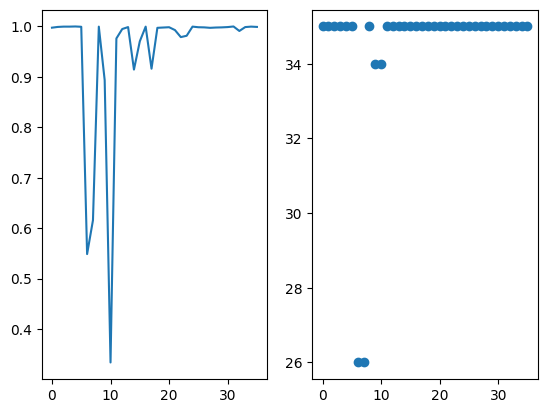

In [18]:
fig,ax = plt.subplots(1,2)
pixel=list(range(pixel_number))
ax[0].plot(pixel,rate)
ax[1].scatter(pixel,max_list_0)

* 各ピクセルを一番占めている数字を、そのピクセルの"振り分けられたとされるピクセル"とした
* 左図は"振り分けられたとされるピクセル"に対する、実際に"振り分けられたとされるピクセル"に振り分けられたピクセルの割合
* 右図はX軸が各ピクセルでY軸がそれに対する"振り分けられたとされるピクセル"
* ほとんどすべてのピクセルの"振り分けられたとされるピクセル"が35なので、正答率は高いが意味がない

## Mini Batch

In [19]:
#学習 Mini batch Kmeans
Mini_1 = MiniBatchKMeans(init="random",n_clusters=pixel_number)

Mini_1.fit(data_start)

y_pred=Mini_1.predict(data_start)


/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/kashiwazaki/.conda/envs/kashiwazaki/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [20]:
#結果

y_pred_re = y_pred.reshape((int(len(y_pred)/pixel_number),pixel_number))
y_pred_df_1 = pd.DataFrame(y_pred_re)
y_pred_df_1.head()

0   1   2   3   4   5   6   7   8   9   ...  26  27  28  29  30  31  32  \
0  21  21  21   2  33   2  11  11   2  34  ...  13  30  21  18   2  10  21   
1  31   6  25  21  21  21  11  21   2  34  ...  13  30  25  18  32  10  25   
2  25   6  25   2  33   4  12  12   2  34  ...  13  30  25  18  18  10  25   
3  31  21  25   2  33   4  11  11   2  25  ...  13  21  25  18  32  21  25   
4  25   6  25   2  33   4  11  12   2  25  ...  13  30  25  18   2  10  25   

   33  34  35  
0  35  21  21  
1  35  22  26  
2  35  27  26  
3  35  27  26  
4  35  27  26  

[5 rows x 36 columns]

0.6830841830841831


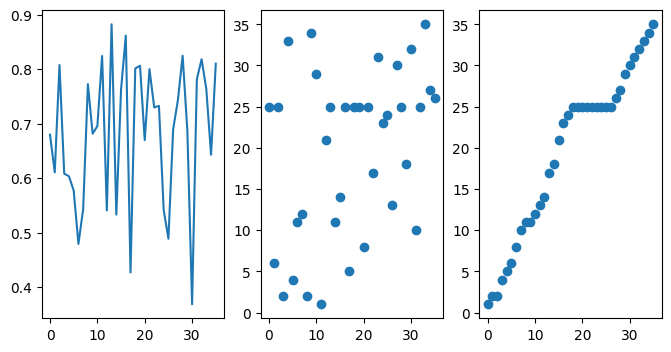

In [29]:
from numpy import average

rate_1=[]
max_list_1 = []
for pixel in range(pixel_number):
    max_ = max(set(y_pred_df_1[pixel]),key=list(y_pred_df_1[pixel]).count)
    count_ = list(y_pred_df_1[pixel]).count(max_)
    rate_1.append(count_/(int(len(y_pred)/pixel_number)))
    max_list_1.append(max_)
    #print(f"max={max_},rate={count_/(lim-1)}")

fig,ax = plt.subplots(1,3,figsize=(8,4))
pixel=list(range(pixel_number))
ax[0].plot(pixel,rate_1)
ax[1].scatter(pixel,max_list_1)
ax[2].scatter(pixel,sorted(max_list_1))

print(average(rate_1))

* 左図が各ピクセルの正答率（さっきやった方法）、真ん中が各ピクセルの右図はX軸が各ピクセルでY軸がそれに対する"振り分けられたとされるピクセル"、右図がそれを小さい銃に並べたもの
* 正答率は平均0.6と低い
* 右図を見ると、２５番ピクセルに振り分けられたピクセルが多いが、結構直線なのでMinibatchのほうがKmeansよりもばらけててよさそう

## log10でのMinibatch

In [30]:
#学習データの作成　log_10 データにする
min_ = 100
start = int(min_/f_resolution)

data_log = []

#all 0 あるので実際のカテゴリとの比較
true_list = list()

for i in range(len(data)):

    D = data[i]
    
    #初期化
    ap = []
    before = 0

    if D[0] != 0:#all 0を除く、一番初めが０だと、まあ全部ゼロという説を信じ、ガバガバ分類
    
        for d in D[start:]:

            if d > 0:
                ap.append(math.log(d))
                before = math.log(d)

            else:#0以下だったら前の値入れる
                ap.append(before)

        data_log.append(ap)
        true_list.append(i%pixel_number)

In [32]:
#学習 Mini batch Kmeans
Mini_2 = MiniBatchKMeans(n_clusters=pixel_number)

Mini_2.fit(data_log)

y_pred_2=Mini_2.predict(data_log)

In [35]:
#結果

y_pred_dic_2 = dict()
for i in range(len(y_pred_2)):
    if true_list[i] not in list(y_pred_dic_2.keys()):
        y_pred_dic_2[true_list[i]] = [y_pred_2[i]]
    else:
        y_pred_dic_2[true_list[i]].append(y_pred_2[i])

#print(y_pred_dic_2) 結果長いから。。。

0.8370452824381673


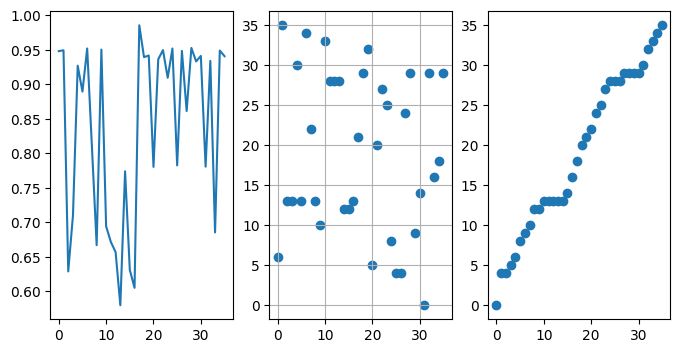

In [37]:
rate_2=[]
max_list_2 = []

for pixel in range(pixel_number):
    max_ = max(set(y_pred_dic_2[pixel]),key=list(y_pred_dic_2[pixel]).count)
    count_ = list(y_pred_dic_2[pixel]).count(max_)
    rate_2.append(count_/len(y_pred_dic_2[pixel]))
    max_list_2.append(max_)
    #print(f"max={max_},rate={count_/(lim-1)}")

fig,ax = plt.subplots(1,3,figsize=(8,4))
pixel=list(range(pixel_number))
ax[0].plot(pixel,rate_2)
ax[1].scatter(pixel,max_list_2)
ax[1].grid()
ax[2].scatter(pixel,sorted(max_list_2))
print(np.average(rate_2))

* raw dataではなく、log10にしたデータを用いた
* 図はさっきのMInibatchと同じ
* 正答率はさっきより高い。
* ばらつきもばらついてそう->定量的に評価したほうが良いか

## 教師ありでやってみるか

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [74]:
X_train,X_test,y_train,y_test = train_test_split(data_log[:20000],true_list[:20000])#多いのでデータ数減らした
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [78]:
# 結果
y_pred = sgd.predict(X_test)
m = confusion_matrix(y_test,y_pred)
print(m)

[[  0  23   0 ...   0   3   0]
 [  0 130   0 ...   0   0   0]
 [  0   0 129 ...   0   0   0]
 ...
 [  0   0   0 ...  22 102   0]
 [  0   0   0 ...   0 136   0]
 [  0   0   0 ...   0 133   0]]


In [79]:
# 各ピクセルの正答率
for pixel in range(pixel_number):
    print(f"{pixel}:{m[pixel][pixel]/sum(m[pixel])}")

0:0.0
1:0.9701492537313433
2:0.9923076923076923
3:1.0
4:0.9855072463768116
5:0.9851851851851852
6:0.993006993006993
7:0.9852941176470589
8:0.6888888888888889
9:0.967741935483871
10:0.2662337662337662
11:0.9565217391304348
12:0.9555555555555556
13:0.9930555555555556
14:0.9215686274509803
15:0.9917355371900827
16:0.98125
17:0.9716312056737588
18:0.023076923076923078
19:0.9735099337748344
20:0.9681528662420382
21:0.9790209790209791
22:0.9523809523809523
23:0.9924812030075187
24:0.993103448275862
25:0.9701492537313433
26:0.9784172661870504
27:0.9305555555555556
28:0.9926470588235294
29:0.9166666666666666
30:0.950354609929078
31:0.9931506849315068
32:0.9733333333333334
33:0.15827338129496402
34:1.0
35:0.0


* 各ピクセルに対する正答率
* 何の前処理してなくても、高い精度、ほとんど0.95~0.99
* ところどころ０があるのは、データ数が少ないから？前処理と化したほうがいいか

<AxesSubplot: >

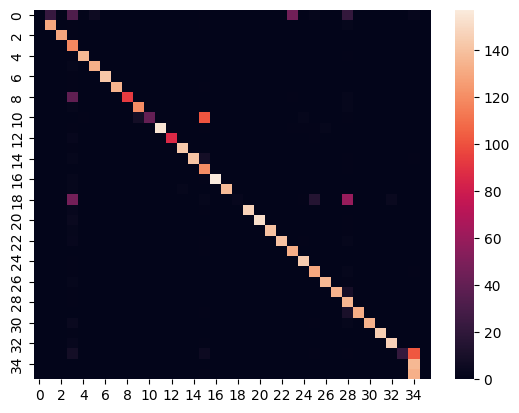

In [80]:
sns.heatmap(m)

In [ ]:
# 0を除く かつ　log にする

"""
data = []

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz") 


for file in npz_files[2000:]:
    df = pd.DataFrame(np.load(file)["arr_0"])
    time = datetime.datetime.strptime(file.split("_")[-1].split(".")[0],'%Y%m%d-%H%M%S')

    for pixel in range(pixel_number):
        D = df[pixel]

        if (D==0).all() == False: # delete all 0
            
            log_data = []
            before = 0
            
            for d in D:

                if d > 0:
                    log_data.append(np.log10(d))
                    before = math.log10(d)
                else:
                    log_data.append(before)

            data.append({
                "time": time,
                "true_pixel":pixel,
                "log_data":log_data
            })
        #print(pixel+npz_files.index(file)*36)

"""

In [ ]:
"""
# 0を除く かつ　log にする

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz") 

df_DATA = pd.DataFrame(np.load(npz_files[0])["arr_0"])

for file in npz_files[1:]:
    df = pd.DataFrame(np.load(file)["arr_0"])
    df_DATA = pd.concat([df_DATA,df],axis=1)
    #print(npz_files.index(file))
"""